In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import acquire


Using your store items data:

Convert date column to datetime format.

In [2]:
df = acquire.superstore()


In [3]:
df.shape


(913000, 14)

In [4]:
df.head(1)


,sale_amount,sale_date,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
0,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


In [5]:
df.sale_date = df.sale_date.str.replace('00:00:00 GMT', '')


In [6]:
df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y ')


In [7]:
df.sale_date.head()


0   2013-01-01
1   2013-01-02
2   2013-01-03
3   2013-01-04
4   2013-01-05
Name: sale_date, dtype: datetime64[ns]

Plot the distribution of sale_amount and item_price.

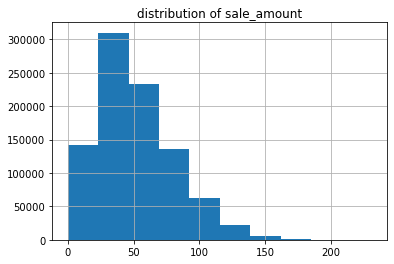

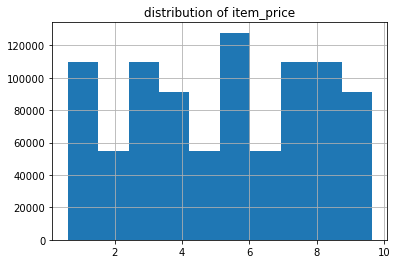

In [8]:
df.sale_amount.hist()
plt.title('distribution of sale_amount')
plt.show()

df.item_price.hist()
plt.title('distribution of item_price')
plt.show()

Set the index to be the datetime variable.

In [12]:
df = df.set_index('sale_date')



KeyError: "None of ['sale_date'] are in the columns"

In [17]:
df.head()

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Tuesday,10.92
2013-01-02,11.0,2,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Wednesday,9.24
2013-01-03,14.0,3,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Thursday,11.76
2013-01-04,13.0,4,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Friday,10.92
2013-01-05,10.0,5,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Saturday,8.40


Add a 'month' and 'day of week' column to your dataframe.

In [13]:
df['month'] = df.index.month_name()
df['day_of_week'] = df.index.day_name()


In [14]:
df.head()


,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week
sale_date,,,,,,,,,,,,,,,
2013-01-01,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Tuesday
2013-01-02,11.0,2,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Wednesday
2013-01-03,14.0,3,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Thursday
2013-01-04,13.0,4,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Friday
2013-01-05,10.0,5,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Saturday


Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [15]:
df['sales_total'] = df.sale_amount * df.item_price


In [16]:
df.head()


,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Tuesday,10.92
2013-01-02,11.0,2,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Wednesday,9.24
2013-01-03,14.0,3,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Thursday,11.76
2013-01-04,13.0,4,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Friday,10.92
2013-01-05,10.0,5,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Saturday,8.40


Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [18]:
def set_index(df):
    df.sale_date = df.sale_date.str.replace('00:00:00 GMT', '')
    df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y ')
    df = df.set_index('sale_date')
    return df

def plot_hist(df):
    df.sale_amount.hist()
    plt.title('distribution of sale_amount')
    plt.show()

    df.item_price.hist()
    plt.title('distribution of item_price')
    plt.show()

def add_month_and_day(df):
    df['month'] = df.index.month_name()
    df['day_of_week'] = df.index.day_name()
    return df

def add_sales_total(df):
    df['sales_total'] = df.sale_amount * df.item_price
    return df

def prepare_store(df):
    df = set_index(df)
    plot_hist(df)
    df = add_month_and_day(df)
    df = add_sales_total(df)
    return df


Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

Convert date column to datetime format.

In [19]:
url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
electric_data = pd.read_csv(url)

In [20]:
electric_data

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [22]:
electric_data.Date = pd.to_datetime(electric_data.Date)


In [23]:
electric_data.Date.head()


0   2006-01-01
1   2006-01-02
2   2006-01-03
3   2006-01-04
4   2006-01-05
Name: Date, dtype: datetime64[ns]

Plot the distribution of each of your variables.

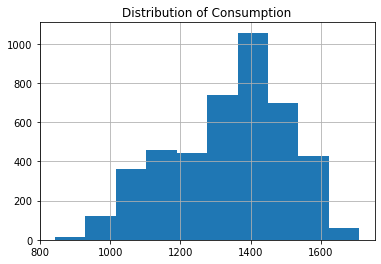

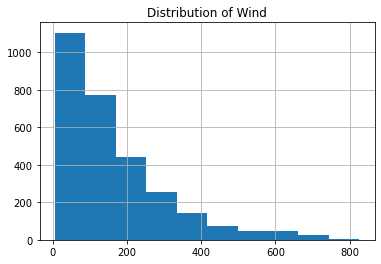

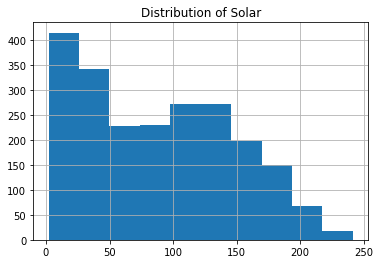

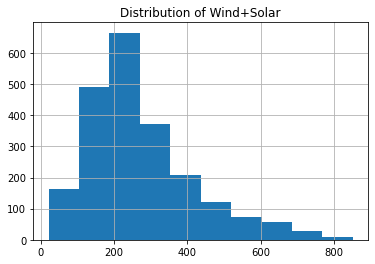

In [24]:
cols = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
for col in cols:
    electric_data[col].hist()
    plt.title(f'Distribution of {col}')
    plt.show()

Set the index to be the datetime variable.

In [25]:
electric_data = electric_data.set_index('Date')


In [26]:
electric_data.head()


,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


Add a month and a year column to your dataframe.

In [27]:
electric_data['month'] = electric_data.index.month_name()
electric_data['day_of_week'] = electric_data.index.day_name()

In [28]:
electric_data.head()

,Consumption,Wind,Solar,Wind+Solar,month,day_of_week
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January,Sunday
2006-01-02,1380.521,NaN,NaN,NaN,January,Monday
2006-01-03,1442.533,NaN,NaN,NaN,January,Tuesday
2006-01-04,1457.217,NaN,NaN,NaN,January,Wednesday
2006-01-05,1477.131,NaN,NaN,NaN,January,Thursday


Fill any missing values.

In [29]:
electric_data.isnull().sum()


Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
month             0
day_of_week       0
dtype: int64

In [31]:
electric_data = electric_data.fillna(0)
electric_data.head()


,Consumption,Wind,Solar,Wind+Solar,month,day_of_week
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,Sunday
2006-01-02,1380.521,0.0,0.0,0.0,January,Monday
2006-01-03,1442.533,0.0,0.0,0.0,January,Tuesday
2006-01-04,1457.217,0.0,0.0,0.0,January,Wednesday
2006-01-05,1477.131,0.0,0.0,0.0,January,Thursday


Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.